In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler

columns = ['Age','Workclass','fnlgwt','Education','Education num','Marital Status',
           'Occupation','Relationship','Race','Sex','Capital Gain','Capital Loss',
           'Hours/Week','Native country','Income']

train = pd.read_csv('input/adult-training.csv', names=columns)
test = pd.read_csv('input/adult-test.csv', names=columns, skiprows=1)

%matplotlib inline

In [2]:
train.head()

,Age,Workclass,fnlgwt,Education,Education num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Native country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age               32561 non-null int64
Workclass         32561 non-null object
fnlgwt            32561 non-null int64
Education         32561 non-null object
Education num     32561 non-null int64
Marital Status    32561 non-null object
Occupation        32561 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Sex               32561 non-null object
Capital Gain      32561 non-null int64
Capital Loss      32561 non-null int64
Hours/Week        32561 non-null int64
Native country    32561 non-null object
Income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
Age               16281 non-null int64
Workclass         16281 non-null object
fnlgwt            16281 non-null int64
Education         16281 non-null object
Education num     16281 non-null int64
Marital Status    16281 non-null object
Occupation        16281 non-null object
Relationship      16281 non-null object
Race              16281 non-null object
Sex               16281 non-null object
Capital Gain      16281 non-null int64
Capital Loss      16281 non-null int64
Hours/Week        16281 non-null int64
Native country    16281 non-null object
Income            16281 non-null object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [5]:
train.replace(' ?', np.nan, inplace=True)
test.replace(' ?', np.nan, inplace=True)

In [6]:
train.isnull().sum()

Age                  0
Workclass         1836
fnlgwt               0
Education            0
Education num        0
Marital Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital Gain         0
Capital Loss         0
Hours/Week           0
Native country     583
Income               0
dtype: int64

In [7]:
test.isnull().sum()

Age                 0
Workclass         963
fnlgwt              0
Education           0
Education num       0
Marital Status      0
Occupation        966
Relationship        0
Race                0
Sex                 0
Capital Gain        0
Capital Loss        0
Hours/Week          0
Native country    274
Income              0
dtype: int64

In [8]:
train['Income'] = train['Income'].apply(lambda x: 1 if x==' >50K' else 0)
test['Income'] = test['Income'].apply(lambda x: 1 if x==' >50K.' else 0)

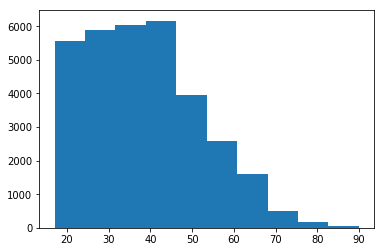

In [9]:
plt.hist(train['Age']);

In [10]:
train['Workclass'].fillna(' 0', inplace=True)
test['Workclass'].fillna(' 0', inplace=True)

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


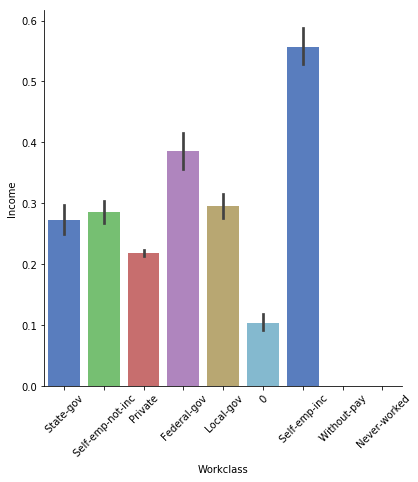

In [11]:
sns.factorplot(x="Workclass", y="Income", data=train, kind="bar", size = 6, 
palette = "muted")
plt.xticks(rotation=45);

In [12]:
train['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 0                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [13]:
train['Workclass'].replace(' Without-pay', ' Never-worked', inplace=True)
test['Workclass'].replace(' Without-pay', ' Never-worked', inplace=True)

In [14]:
train['fnlgwt'].describe()

count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlgwt, dtype: float64

In [15]:
train['fnlgwt'] = train['fnlgwt'].apply(lambda x: np.log1p(x))
test['fnlgwt'] = test['fnlgwt'].apply(lambda x: np.log1p(x))

In [16]:
train['fnlgwt'].describe()

count    32561.000000
mean        11.983778
std          0.630738
min          9.416216
25%         11.676981
50%         12.091542
75%         12.376035
max         14.210727
Name: fnlgwt, dtype: float64

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


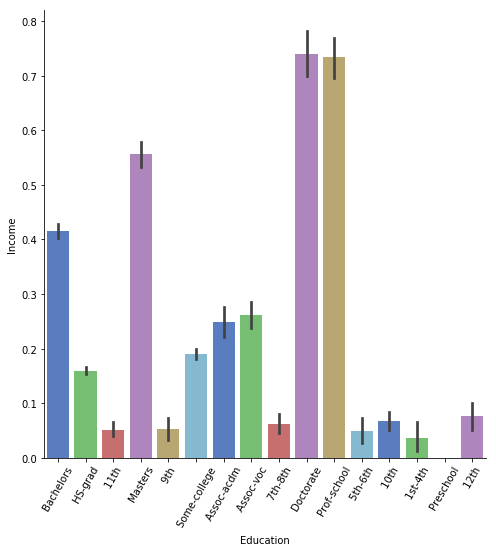

In [17]:
sns.factorplot(x="Education",y="Income",data=train,kind="bar", size = 7, 
palette = "muted")
plt.xticks(rotation=60);

In [18]:
def primary(x):
    if x in [' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th']:
        return ' Primary'
    else:
        return x

In [19]:
train['Education'] = train['Education'].apply(primary)
test['Education'] = test['Education'].apply(primary)

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


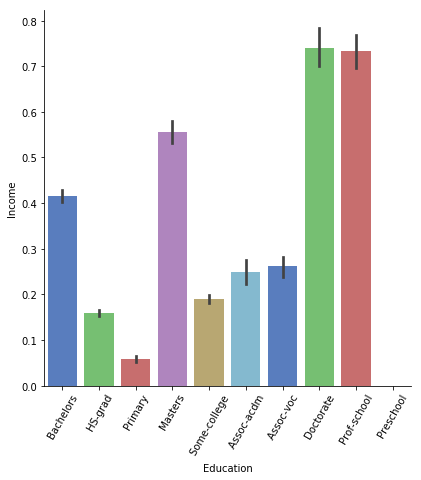

In [20]:
sns.factorplot(x="Education",y="Income",data=train,kind="bar", size = 6, 
palette = "muted")
plt.xticks(rotation=60);

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


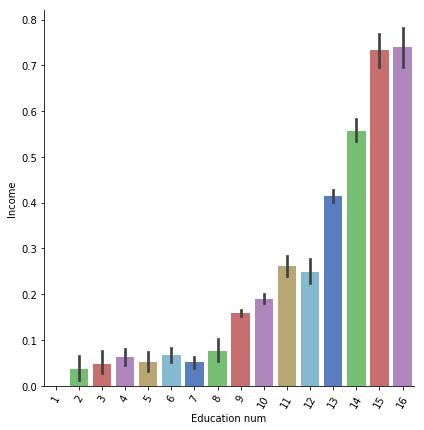

In [21]:
sns.factorplot(x="Education num",y="Income",data=train,kind="bar", size = 6, 
palette = "muted")
plt.xticks(rotation=60);

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


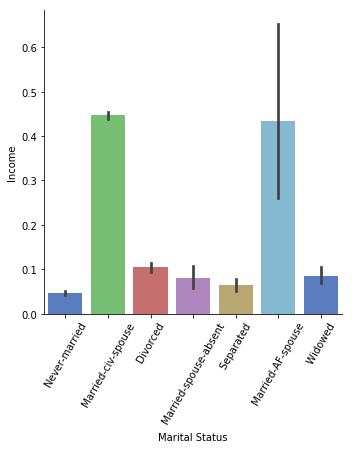

In [22]:
sns.factorplot(x="Marital Status",y="Income",data=train,kind="bar", size = 5, 
palette = "muted")
plt.xticks(rotation=60);

In [23]:
train['Marital Status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital Status, dtype: int64

In [24]:
train['Marital Status'].replace(' Married-AF-spouse', ' Married-civ-spouse', inplace=True)
test['Marital Status'].replace(' Married-AF-spouse', ' Married-civ-spouse', inplace=True)

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


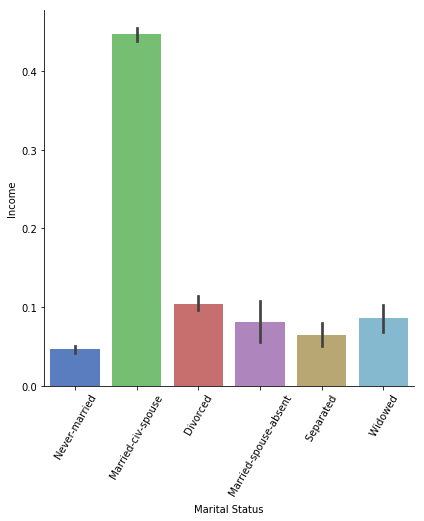

In [25]:
sns.factorplot(x="Marital Status",y="Income",data=train,kind="bar", size = 6, 
palette = "muted")
plt.xticks(rotation=60);

In [26]:
train['Occupation'].fillna(' 0', inplace=True)
test['Occupation'].fillna(' 0', inplace=True)

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


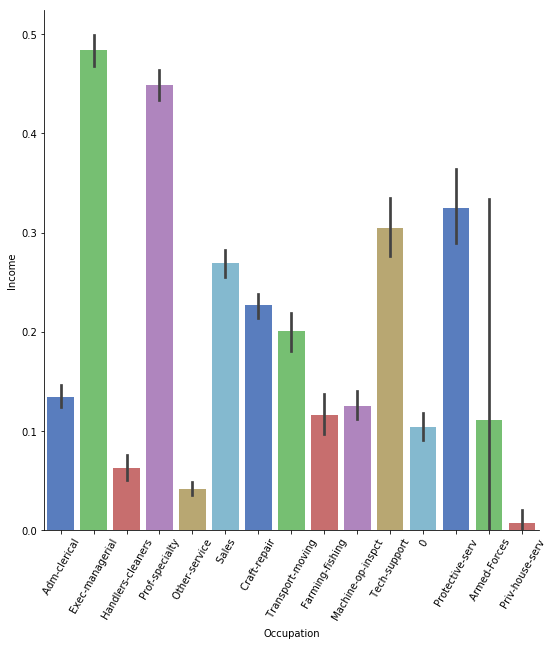

In [27]:
sns.factorplot(x="Occupation",y="Income",data=train,kind="bar", size = 8, 
palette = "muted")
plt.xticks(rotation=60);

In [28]:
train['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 0                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [29]:
train['Occupation'].replace(' Armed-Forces', ' 0', inplace=True)
test['Occupation'].replace(' Armed-Forces', ' 0', inplace=True)

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


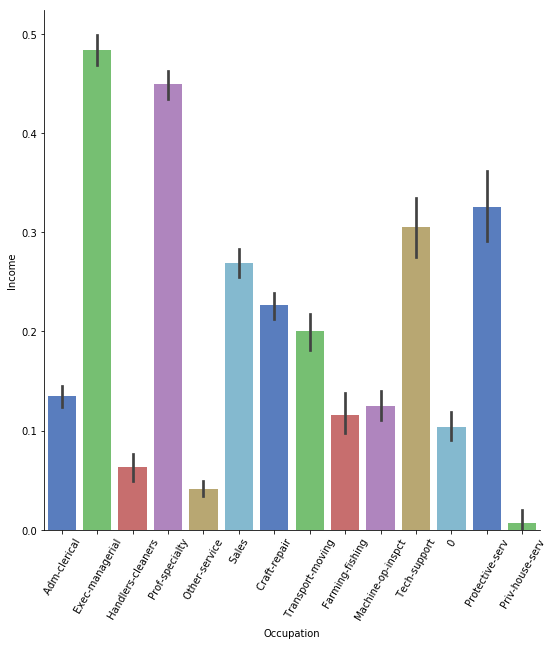

In [30]:
sns.factorplot(x="Occupation",y="Income",data=train,kind="bar", size = 8, 
palette = "muted")
plt.xticks(rotation=60);

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


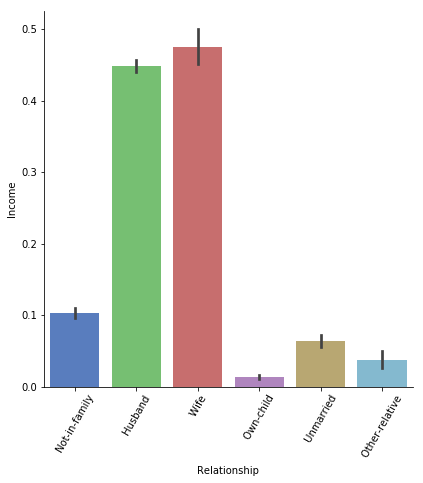

In [31]:
sns.factorplot(x="Relationship",y="Income",data=train,kind="bar", size = 6, 
palette = "muted")
plt.xticks(rotation=60);

In [32]:
train['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


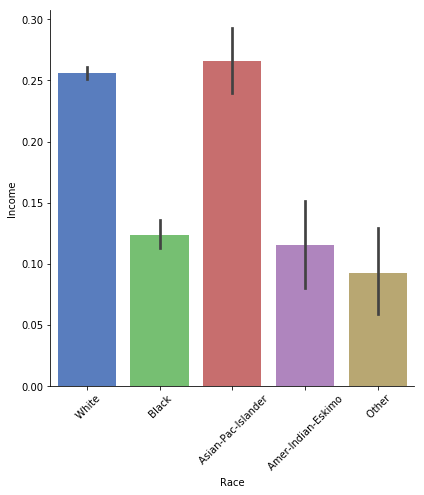

In [33]:
sns.factorplot(x="Race",y="Income",data=train,kind="bar", size = 6, 
palette = "muted")
plt.xticks(rotation=45);

In [34]:
train['Race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


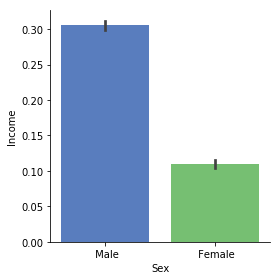

In [35]:
sns.factorplot(x="Sex",y="Income",data=train,kind="bar", size = 4, 
palette = "muted");

In [36]:
train['Native country'].fillna(' 0', inplace=True)
test['Native country'].fillna(' 0', inplace=True)

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


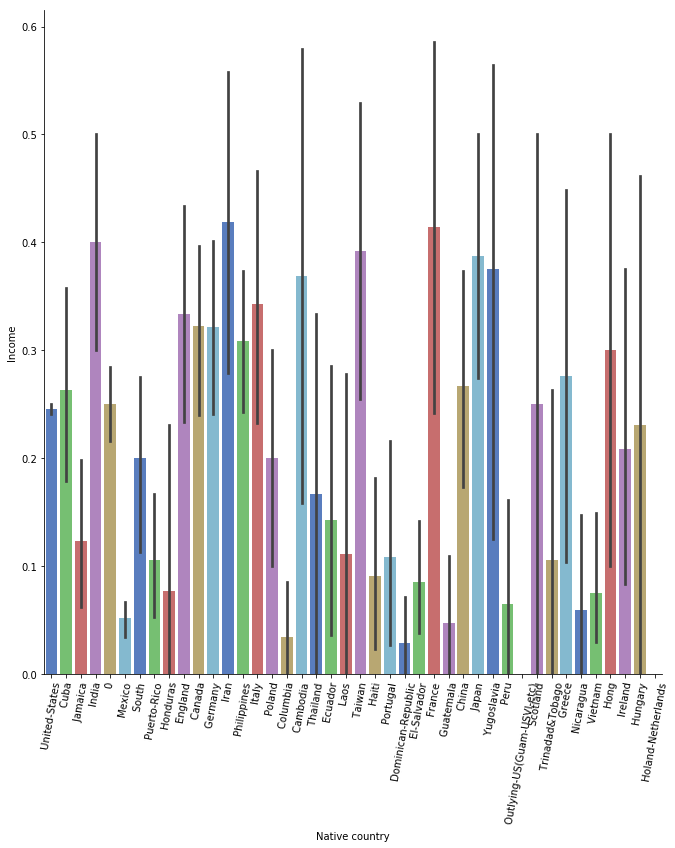

In [37]:
sns.factorplot(x="Native country",y="Income",data=train,kind="bar", size = 10, 
palette = "muted")
plt.xticks(rotation=80);

In [38]:
def native(country):
    if country in [' United-States', ' Cuba', ' 0']:
        return 'US'
    elif country in [' England', ' Germany', ' Canada', ' Italy', ' France', ' Greece', ' Philippines']:
        return 'Western'
    elif country in [' Mexico', ' Puerto-Rico', ' Honduras', ' Jamaica', ' Columbia', ' Laos', ' Portugal', ' Haiti',
                     ' Dominican-Republic', ' El-Salvador', ' Guatemala', ' Peru', 
                     ' Trinadad&Tobago', ' Outlying-US(Guam-USVI-etc)', ' Nicaragua', ' Vietnam', ' Holand-Netherlands' ]:
        return 'Poor' # no offence
    elif country in [' India', ' Iran', ' Cambodia', ' Taiwan', ' Japan', ' Yugoslavia', ' China', ' Hong']:
        return 'Eastern'
    elif country in [' South', ' Poland', ' Ireland', ' Hungary', ' Scotland', ' Thailand', ' Ecuador']:
        return 'Poland team'
    
    else: 
        return country 

In [39]:
train['Native country'] = train['Native country'].apply(native)
test['Native country'] = test['Native country'].apply(native)

In [40]:
train['Native country'].value_counts()

US             29848
Poor            1415
Western          677
Eastern          386
Poland team      235
Name: Native country, dtype: int64

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


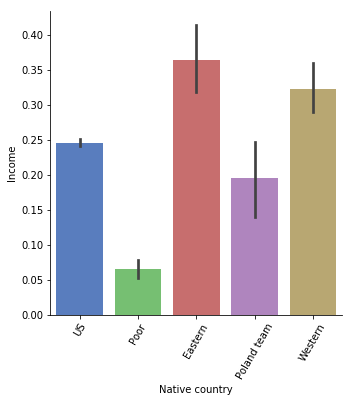

In [41]:
sns.factorplot(x="Native country",y="Income",data=train,kind="bar", size = 5, 
palette = "muted")
plt.xticks(rotation=60);

In [42]:
#merge datasets
joint = pd.concat([train, test], axis=0)

In [43]:
joint.dtypes

Age                 int64
Workclass          object
fnlgwt            float64
Education          object
Education num       int64
Marital Status     object
Occupation         object
Relationship       object
Race               object
Sex                object
Capital Gain        int64
Capital Loss        int64
Hours/Week          int64
Native country     object
Income              int64
dtype: object

In [44]:
#list of columns with dtype: object
categorical_features = joint.select_dtypes(include=['object']).axes[1]

for col in categorical_features:
    print (col, joint[col].nunique())

Workclass 8
Education 10
Marital Status 6
Occupation 14
Relationship 6
Race 5
Sex 2
Native country 5


In [45]:
#one-hot encode
for col in categorical_features:
    joint = pd.concat([joint, pd.get_dummies(joint[col], prefix=col, prefix_sep=':')], axis=1)
    joint.drop(col, axis=1, inplace=True)

In [46]:
joint.head()

,Age,fnlgwt,Education num,Capital Gain,Capital Loss,Hours/Week,Income,Workclass: 0,Workclass: Federal-gov,Workclass: Local-gov,...,Race: Black,Race: Other,Race: White,Sex: Female,Sex: Male,Native country:Eastern,Native country:Poland team,Native country:Poor,Native country:US,Native country:Western
0,39,11.258253,13,2174,0,40,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1,50,11.330348,13,0,0,13,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,38,12.281398,9,0,0,40,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
3,53,12.366157,7,0,0,40,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,28,12.732013,13,0,0,40,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


In [47]:
train = joint.head(train.shape[0])
test = joint.tail(test.shape[0])

In [48]:
Xtrain = train.drop('Income', axis=1)
Ttrain = train['Income']

Xtest = test.drop('Income', axis=1)
Ttest = test['Income']

scaler = StandardScaler()
scaler.fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV
import matplotlib.pylab as plt
gbm0 = GradientBoostingClassifier(random_state=10)
gbm0.fit(Xtrain, Ttrain)
y_pred = gbm0.predict(Xtrain)
y_predprob = gbm0.predict_proba(Xtrain)[:,1]
print('Accuracy: %.4g' % metrics.accuracy_score(Ttrain, y_pred))
print('AUC Score(train): %f' % metrics.roc_auc_score(Ttrain, y_predprob))

D:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
D:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\Anaconda\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Accuracy: 0.8694
AUC Score(train): 0.925900


In [50]:
# 1: learning rate n_estimators

In [51]:
X=Xtrain
y=Ttrain

In [52]:
param_test1 = {'n_estimators':np.arange(80,150,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=300,
                                  min_samples_leaf=20,max_depth=8,max_features='sqrt', subsample=0.8,random_state=10), 
                       param_grid = param_test1, scoring='roc_auc',iid=False,cv=5)
gsearch1.fit(X,y)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.92265, std: 0.00263, params: {'n_estimators': 80},
  mean: 0.92335, std: 0.00273, params: {'n_estimators': 90},
  mean: 0.92373, std: 0.00281, params: {'n_estimators': 100},
  mean: 0.92409, std: 0.00271, params: {'n_estimators': 110},
  mean: 0.92420, std: 0.00271, params: {'n_estimators': 120},
  mean: 0.92449, std: 0.00264, params: {'n_estimators': 130},
  mean: 0.92476, std: 0.00261, params: {'n_estimators': 140}],
 {'n_estimators': 140},
 0.9247599427551059)

In [ ]:
#  {'n_estimators': 140}, 0.9247599427551059)
# 2：max_depth & min_sample_split

In [54]:
param_test2 = {'max_depth':np.arange(12,18,1), 'min_samples_split':np.arange(600,900,100)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=140, min_samples_leaf=20, 
      max_features='sqrt', subsample=0.8, random_state=10), 
   param_grid = param_test2, scoring='roc_auc',iid=False, cv=5)
gsearch2.fit(X,y)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.92543, std: 0.00301, params: {'max_depth': 12, 'min_samples_split': 600},
  mean: 0.92538, std: 0.00264, params: {'max_depth': 12, 'min_samples_split': 700},
  mean: 0.92562, std: 0.00284, params: {'max_depth': 12, 'min_samples_split': 800},
  mean: 0.92519, std: 0.00269, params: {'max_depth': 13, 'min_samples_split': 600},
  mean: 0.92559, std: 0.00254, params: {'max_depth': 13, 'min_samples_split': 700},
  mean: 0.92561, std: 0.00276, params: {'max_depth': 13, 'min_samples_split': 800},
  mean: 0.92488, std: 0.00262, params: {'max_depth': 14, 'min_samples_split': 600},
  mean: 0.92524, std: 0.00246, params: {'max_depth': 14, 'min_samples_split': 700},
  mean: 0.92530, std: 0.00287, params: {'max_depth': 14, 'min_samples_split': 800},
  mean: 0.92533, std: 0.00215, params: {'max_depth': 15, 'min_samples_split': 600},
  mean: 0.92496, std: 0.00234, params: {'max_depth': 15, 'min_samples_split': 700},
  mean: 0.92542, std: 0.00244, params: {'max_depth': 15, 'min_samples_split'

In [ ]:
#  {'max_depth': 12, 'min_samples_split': 800(not decided now)}, 0.9256194536602511)
# 3:min_sample_split & min_samples_leaf 

In [57]:
param_test3 = {'min_samples_split':np.arange(800,2001,200), 'min_samples_leaf':np.arange(20,60,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=140,max_depth=12,
                                     max_features='sqrt', subsample=0.8, random_state=10), 
                       param_grid = param_test3, scoring='roc_auc',iid=False, cv=5)
gsearch3.fit(X,y)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.92562, std: 0.00284, params: {'min_samples_split': 800, 'min_samples_leaf': 20},
  mean: 0.92573, std: 0.00314, params: {'min_samples_split': 1000, 'min_samples_leaf': 20},
  mean: 0.92562, std: 0.00279, params: {'min_samples_split': 1200, 'min_samples_leaf': 20},
  mean: 0.92538, std: 0.00299, params: {'min_samples_split': 1400, 'min_samples_leaf': 20},
  mean: 0.92551, std: 0.00278, params: {'min_samples_split': 1600, 'min_samples_leaf': 20},
  mean: 0.92563, std: 0.00283, params: {'min_samples_split': 1800, 'min_samples_leaf': 20},
  mean: 0.92575, std: 0.00300, params: {'min_samples_split': 2000, 'min_samples_leaf': 20},
  mean: 0.92529, std: 0.00263, params: {'min_samples_split': 800, 'min_samples_leaf': 30},
  mean: 0.92515, std: 0.00291, params: {'min_samples_split': 1000, 'min_samples_leaf': 30},
  mean: 0.92574, std: 0.00291, params: {'min_samples_split': 1200, 'min_samples_leaf': 30},
  mean: 0.92491, std: 0.00269, params: {'min_samples_split': 1400, 'min_samples_le

In [ ]:
#  {'min_samples_leaf': 30, 'min_samples_split': 1800},0.925780242928602)
# now we can look the result first

In [59]:
gbm1 = GradientBoostingClassifier(learning_rate=0.1, n_estimators=140,max_depth=12, min_samples_leaf =30, 
               min_samples_split =1800, max_features='sqrt', subsample=0.8, random_state=10)
gbm1.fit(X,y)
y_pred = gbm1.predict(X)
y_predprob = gbm1.predict_proba(X)[:,1]
print("Accuracy : %.4g" % metrics.accuracy_score(y.values, y_pred))
print("AUC Score (Train): %f" % metrics.roc_auc_score(y, y_predprob))

Accuracy : 0.8809
AUC Score (Train): 0.937353


In [60]:
# 4:max_features

In [65]:
param_test4 = {'max_features':np.arange(34,50,2)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=140,max_depth=12, min_samples_leaf =30, 
               min_samples_split =1800, subsample=0.8, random_state=10), 
                       param_grid = param_test4, scoring='roc_auc',iid=False, cv=5)
gsearch4.fit(X,y)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.92755, std: 0.00235, params: {'max_features': 34},
  mean: 0.92763, std: 0.00196, params: {'max_features': 36},
  mean: 0.92777, std: 0.00213, params: {'max_features': 38},
  mean: 0.92730, std: 0.00246, params: {'max_features': 40},
  mean: 0.92732, std: 0.00238, params: {'max_features': 42},
  mean: 0.92751, std: 0.00220, params: {'max_features': 44},
  mean: 0.92737, std: 0.00220, params: {'max_features': 46},
  mean: 0.92732, std: 0.00242, params: {'max_features': 48}],
 {'max_features': 38},
 0.9277711615607348)

In [64]:
# {'max_features': 38},0.9277711615607348)
# 5:subsample

In [66]:
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9,1.0]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=140,max_depth=12, min_samples_leaf =30, 
               min_samples_split =1800, max_features=38, random_state=10), 
                       param_grid = param_test5, scoring='roc_auc',iid=False, cv=5)
gsearch5.fit(X,y)
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.92609, std: 0.00247, params: {'subsample': 0.6},
  mean: 0.92689, std: 0.00215, params: {'subsample': 0.7},
  mean: 0.92703, std: 0.00240, params: {'subsample': 0.75},
  mean: 0.92777, std: 0.00213, params: {'subsample': 0.8},
  mean: 0.92765, std: 0.00231, params: {'subsample': 0.85},
  mean: 0.92803, std: 0.00203, params: {'subsample': 0.9},
  mean: 0.92867, std: 0.00194, params: {'subsample': 1.0}],
 {'subsample': 1.0},
 0.9286666310283163)

In [67]:
#  {'subsample': 1.0},0.9286666310283163)
# 6: slow down the learning rate

In [69]:
gbm2 = GradientBoostingClassifier(learning_rate=0.1, n_estimators=140,max_depth=12, min_samples_leaf =30, 
               min_samples_split =1800, max_features=38, subsample=1.0, random_state=10)
gbm2.fit(X,y)
y_pred = gbm2.predict(X)
y_predprob = gbm2.predict_proba(X)[:,1]
print ("Accuracy : %.4g" % metrics.accuracy_score(y.values, y_pred))
print ("AUC Score (Train): %f" % metrics.roc_auc_score(y, y_predprob))

Accuracy : 0.8888
AUC Score (Train): 0.944528


In [70]:
test_pred = gbm2.predict(Xtest)
print ("Accuracy : %.4g" % metrics.accuracy_score(Ttest, test_pred))

Accuracy : 0.8741


In [71]:
# now the highest accuracy is 0.8741

In [ ]:
# logistic regression data prediction

In [52]:
Xtrain_logis = Xtrain.copy()
Ttrain_logis = Ttrain.copy()
Xtest_logis = Xtest.copy()
Ttest_logis = Ttest.copy()

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [54]:
model = LogisticRegression()
model.fit(Xtrain_logis, Ttrain_logis)

print('traing accuracy:', model.score(Xtrain_logis, Ttrain_logis))
print('testing accuracy', model.score(Xtest_logis, Ttest_logis))

traing accuracy: 0.8528607843739443
testing accuracy 0.8531416989128432


In [55]:
# Adaboost

In [91]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100).fit(Xtrain, Ttrain)
print('traing accuracy:', ada.score(Xtrain, Ttrain))
print('testing accuracy', ada.score(Xtest, Ttest))

traing accuracy: 0.8655753815914745
testing accuracy 0.863276211534918


In [ ]:
# GBRT

In [94]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV
import matplotlib.pylab as plt
gbm0 = GradientBoostingClassifier(random_state=10)
gbm0.fit(Xtrain, Ttrain)
y_pred = gbm0.predict(Xtrain)
y_predprob = gbm0.predict_proba(Xtrain)[:,1]
print('Accuracy: %.4g' % metrics.accuracy_score(Ttrain, y_pred))
print('AUC Score(train): %f' % metrics.roc_auc_score(Ttrain, y_predprob))

#overfitting


Accuracy: 0.8694
AUC Score(train): 0.925900


In [95]:
# 1: learning rate n_estimators

In [97]:
X=Xtrain
y=Ttrain

In [104]:
param_test1 = {'n_estimators':np.arange(80,150,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=300,
                                  min_samples_leaf=20,max_depth=8,max_features='sqrt', subsample=0.8,random_state=10), 
                       param_grid = param_test1, scoring='roc_auc',iid=False,cv=5)
gsearch1.fit(X,y)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.92420, std: 0.00271, params: {'n_estimators': 120},
  mean: 0.92449, std: 0.00264, params: {'n_estimators': 130},
  mean: 0.92476, std: 0.00261, params: {'n_estimators': 140},
  mean: 0.92474, std: 0.00263, params: {'n_estimators': 150},
  mean: 0.92491, std: 0.00259, params: {'n_estimators': 160},
  mean: 0.92511, std: 0.00249, params: {'n_estimators': 170}],
 {'n_estimators': 170},
 0.9251066300929432)

In [105]:
param_test2 = {'max_depth':np.arange(3,14,2), 'min_samples_split':np.arange(100,801,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=120, min_samples_leaf=20, 
      max_features='sqrt', subsample=0.8, random_state=10), 
   param_grid = param_test2, scoring='roc_auc',iid=False, cv=5)
gsearch2.fit(X,y)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.91781, std: 0.00297, params: {'max_depth': 3, 'min_samples_split': 100},
  mean: 0.91765, std: 0.00313, params: {'max_depth': 3, 'min_samples_split': 300},
  mean: 0.91750, std: 0.00293, params: {'max_depth': 3, 'min_samples_split': 500},
  mean: 0.91756, std: 0.00288, params: {'max_depth': 3, 'min_samples_split': 700},
  mean: 0.92202, std: 0.00321, params: {'max_depth': 5, 'min_samples_split': 100},
  mean: 0.92145, std: 0.00316, params: {'max_depth': 5, 'min_samples_split': 300},
  mean: 0.92141, std: 0.00321, params: {'max_depth': 5, 'min_samples_split': 500},
  mean: 0.92110, std: 0.00313, params: {'max_depth': 5, 'min_samples_split': 700},
  mean: 0.92348, std: 0.00274, params: {'max_depth': 7, 'min_samples_split': 100},
  mean: 0.92392, std: 0.00285, params: {'max_depth': 7, 'min_samples_split': 300},
  mean: 0.92323, std: 0.00246, params: {'max_depth': 7, 'min_samples_split': 500},
  mean: 0.92318, std: 0.00247, params: {'max_depth': 7, 'min_samples_split': 700},
  me

In [58]:
# bagging

In [68]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
bagging = BaggingClassifier(LogisticRegression(), max_samples=0.9, max_features=0.9).fit(Xtrain, Ttrain)
print('traing accuracy:', bagging.score(Xtrain, Ttrain))
print('testing accuracy', bagging.score(Xtest, Ttest))
# compared to logistic, there is no evident improvement

traing accuracy: 0.8529529191363902
testing accuracy 0.8540015969535041


In [61]:
# random forest

In [78]:
from sklearn.ensemble import RandomForestClassifier
random_1 = RandomForestClassifier(n_estimators=20, max_depth=None, min_samples_split=20, random_state=0).fit(Xtrain, Ttrain)
print('traing accuracy:', random_1.score(Xtrain, Ttrain))
print('testing accuracy', random_1.score(Xtest, Ttest))
# some overfitting

traing accuracy: 0.908694450416142
testing accuracy 0.865118850193477


In [76]:
# extreme forest

In [79]:
from sklearn.ensemble import ExtraTreesClassifier
extra = ExtraTreesClassifier(n_estimators=20, max_depth=None, min_samples_split=20, random_state=0).fit(Xtrain, Ttrain)
print('traing accuracy:', extra.score(Xtrain, Ttrain))
print('testing accuracy', extra.score(Xtest, Ttest))

traing accuracy: 0.9019071895826295
testing accuracy 0.849640685461581
